<a href="https://colab.research.google.com/github/RaphielAS/PCVK_Genap_2021/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

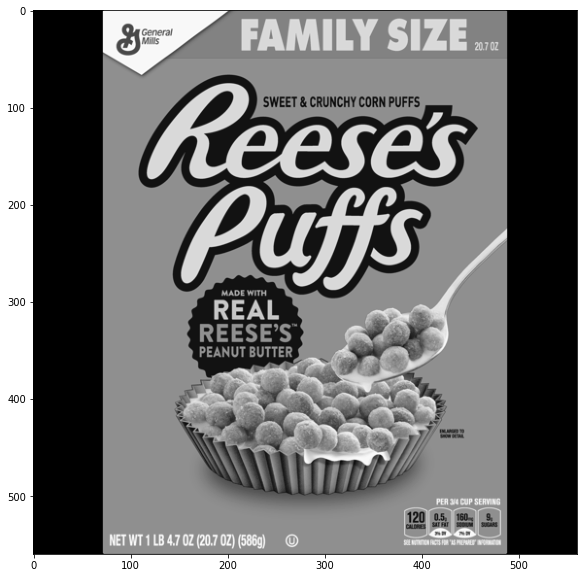

In [4]:
reeses = cv.imread('/content/drive/MyDrive/PCVK/facedet/reeses_puffs.png',0)
display(reeses)

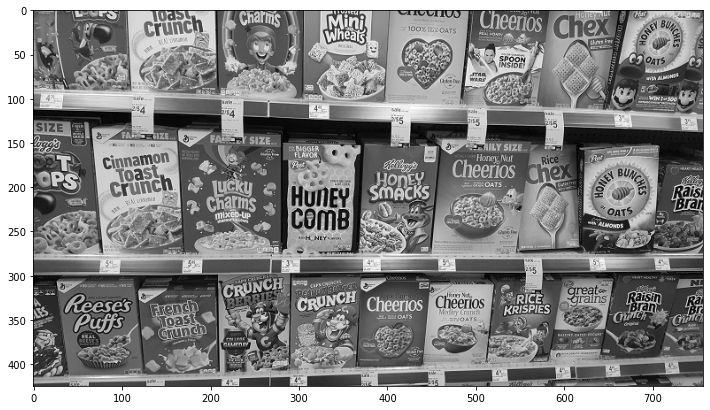

In [5]:
cereals = cv.imread('/content/drive/MyDrive/PCVK/facedet/many_cereals.jpg',0)
display(cereals)

In [6]:
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)
bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck = True)
matches = bf.match(des1,des2)
single_match = matches[0]
single_match.distance

71.0

In [7]:
len(matches)

139

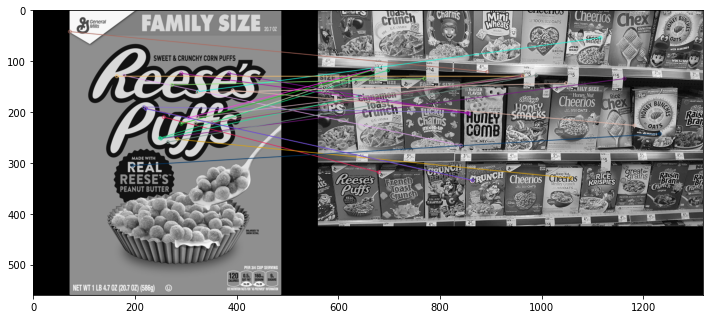

In [8]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

In [9]:
!pip install opencv-contrib-python==4.4.0.44

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
good = []
for match1,match2 in matches:
  if match1.distance < 0.75*match2.distance:
    good.append([match1])
  
len(good)

79

In [11]:
len(matches)

1501

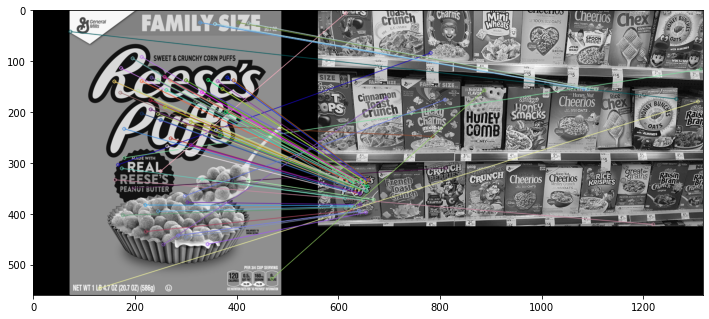

In [12]:
sift_matches = cv.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches)

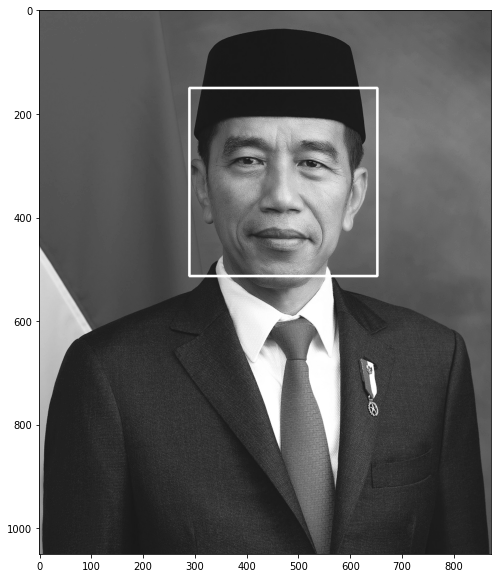

In [15]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')

jokowi = cv.imread('/content/drive/MyDrive/PCVK/facedet/jokowi.jpg', 0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

<Figure size 720x720 with 0 Axes>

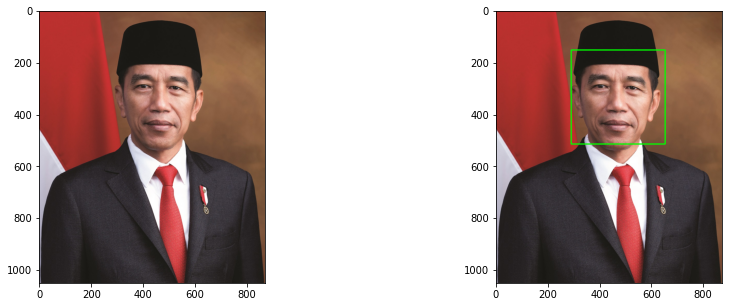

<Figure size 720x720 with 0 Axes>

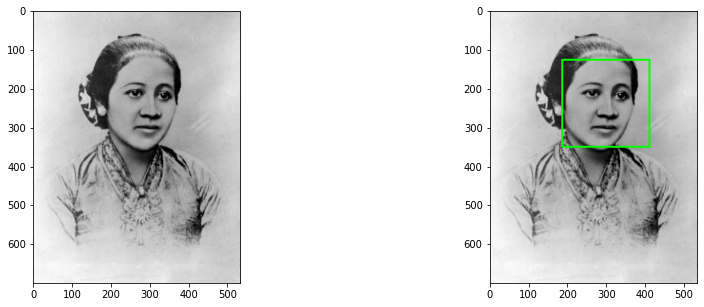

<Figure size 720x720 with 0 Axes>

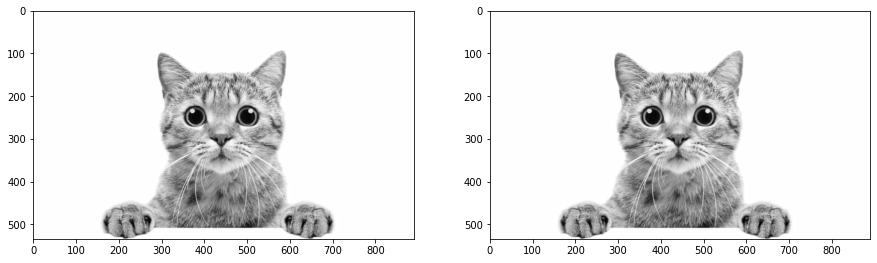

<Figure size 720x720 with 0 Axes>

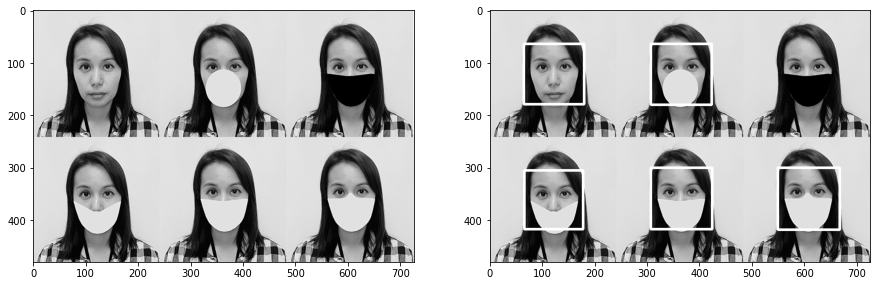

<Figure size 720x720 with 0 Axes>

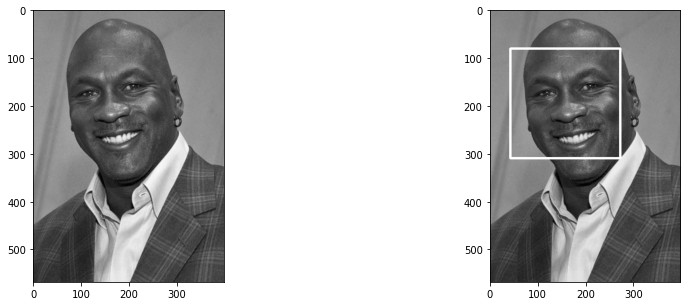

<Figure size 720x720 with 0 Axes>

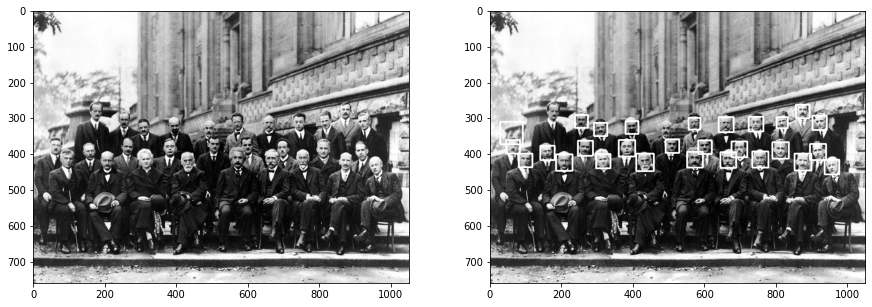

In [16]:
# nomer 2 (face det)
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')

# 1
jokowi = cv.imread('/content/drive/MyDrive/PCVK/facedet/jokowi.jpg')
jokowi1 = cv.imread('/content/drive/MyDrive/PCVK/facedet/jokowi.jpg')
roi_wajah1 = cascade_wajah.detectMultiScale(jokowi1) 

roi_wajah = cascade_wajah.detectMultiScale(jokowi) 
for(x,y,w,h) in roi_wajah: 
 cv.rectangle(jokowi,(x,y),(x+w,y+h),(0,255,0),3) 
plt.figure(figsize = (10,10)) 

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(jokowi1, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(jokowi1, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB))
axarr[1].imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB))
plt.show()

# 2
kartini = cv.imread('/content/drive/MyDrive/PCVK/facedet/kartini.jpg')
kartini1 = cv.imread('/content/drive/MyDrive/PCVK/facedet/kartini.jpg')
roi_wajah1 = cascade_wajah.detectMultiScale(kartini1) 

roi_wajah = cascade_wajah.detectMultiScale(kartini) 
for(x,y,w,h) in roi_wajah: 
 cv.rectangle(kartini,(x,y),(x+w,y+h),(0,255,0),3) 
plt.figure(figsize = (10,10)) 

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(kartini1, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(kartini1, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv.cvtColor(kartini, cv.COLOR_BGR2RGB))
axarr[1].imshow(cv.cvtColor(kartini, cv.COLOR_BGR2RGB))
plt.show()

# 3
kucing = cv.imread('/content/drive/MyDrive/PCVK/facedet/kucing.jpg')
kucing1 = cv.imread('/content/drive/MyDrive/PCVK/facedet/kucing.jpg')

kucing_ori = cv.cvtColor(kucing, cv.COLOR_BGR2GRAY)
kucing_ori1 = cv.cvtColor(kucing1, cv.COLOR_BGR2GRAY)

roi_wajah = cascade_wajah.detectMultiScale(kucing1)
for (x,y,w,h) in roi_wajah: 
  cv.rectangle(kucing1,(x,y),(x+w,y+h),(255,0,255),3) 
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(kucing_ori, cmap='gray')
plt.subplot(122),plt.imshow(kucing_ori1, cmap='gray')
plt.show()

# 4
mask = cv.imread('/content/drive/MyDrive/PCVK/facedet/mask.png', 0)
mask1 = cv.imread('/content/drive/MyDrive/PCVK/facedet/mask.png', 0)

roi_wajah = cascade_wajah.detectMultiScale(mask1)
for(x,y,w,h) in roi_wajah:
 cv.rectangle(mask1,(x,y),(x+w,y+h),(255,0,255),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(mask, cmap='gray')
plt.subplot(122),plt.imshow(mask1, cmap='gray')
plt.show() 

# 5
jordan = cv.imread('/content/drive/MyDrive/PCVK/facedet/mjordan.jpg', 0)
jordan1 = cv.imread('/content/drive/MyDrive/PCVK/facedet/mjordan.jpg', 0)

roi_wajah = cascade_wajah.detectMultiScale(jordan1)
for(x,y,w,h) in roi_wajah:
 cv.rectangle(jordan1,(x,y),(x+w,y+h),(255,0,255),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(jordan, cmap='gray')
plt.subplot(122),plt.imshow(jordan1, cmap='gray')
plt.show()

# 6
kelompok = cv.imread('/content/drive/MyDrive/PCVK/facedet/solvayconf.jpg', 0)
kelompok1 = cv.imread('/content/drive/MyDrive/PCVK/facedet/solvayconf.jpg', 0)

roi_wajah = cascade_wajah.detectMultiScale(kelompok1)
for(x,y,w,h) in roi_wajah:
 cv.rectangle(kelompok1,(x,y),(x+w,y+h),(255,0,255),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(kelompok, cmap='gray')
plt.subplot(122),plt.imshow(kelompok1, cmap='gray')
plt.show()

<Figure size 720x720 with 0 Axes>

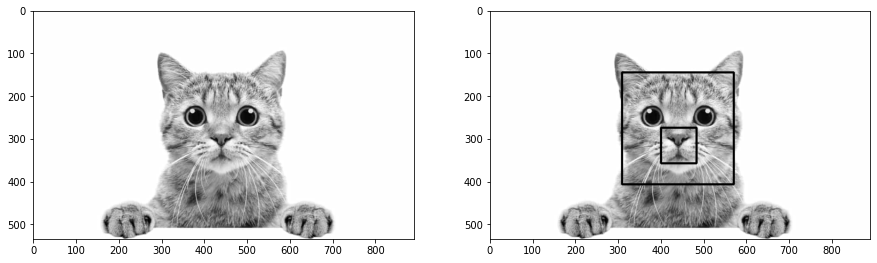

In [17]:
cascade_cat = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalcatface.xml')

kucing = cv.imread('/content/drive/MyDrive/PCVK/facedet/kucing.jpg', 0)
kucing1 = cv.imread('/content/drive/MyDrive/PCVK/facedet/kucing.jpg', 0)

roi_wajah = cascade_cat.detectMultiScale(kucing1)
for (x,y,w,h) in roi_wajah: 
  cv.rectangle(kucing1,(x,y),(x+w,y+h),(0,255,0),3) 
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(kucing, cmap='gray')
plt.subplot(122),plt.imshow(kucing1, cmap='gray')
plt.show()

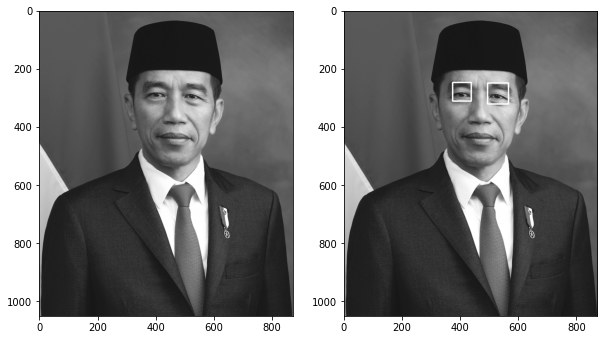

In [18]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_lefteye_2splits.xml') 

jokowi = cv.imread('/content/drive/MyDrive/PCVK/facedet/jokowi.jpg')
jokowi_ori = cv.imread('/content/drive/MyDrive/PCVK/facedet/jokowi.jpg')
jokowi_gray = cv.cvtColor(jokowi, cv.COLOR_BGR2GRAY)
jokowi_ori_gray = cv.cvtColor(jokowi_ori, cv.COLOR_BGR2GRAY)

roi_wajah = cascade_wajah.detectMultiScale(jokowi_gray)
for (x,y,w,h) in roi_wajah: 
  cv.rectangle(jokowi_gray,(x,y),(x+w,y+h),(255,255,255),3)

# Plot outputs
f, axarr = plt. subplots(1,2,figsize=(10,10))
plt.subplot(121),plt.imshow(jokowi_ori_gray, cmap='gray')
plt.subplot(122),plt.imshow(jokowi_gray, cmap='gray')
plt.show()

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


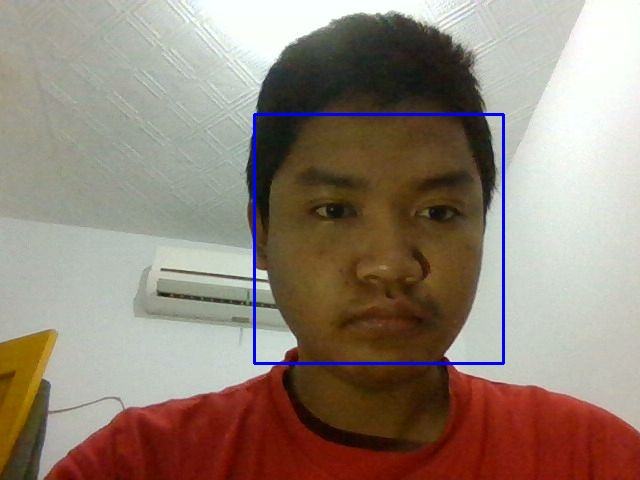

<IPython.core.display.Javascript object>

In [21]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalface_default.xml')

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

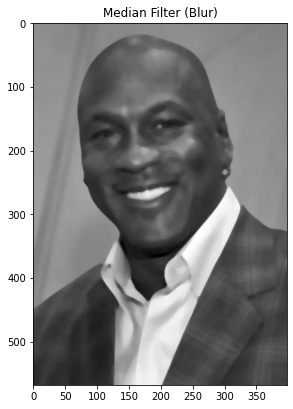

In [23]:
# nomer 6 (blurring face)
img_mj = cv.imread('/content/drive/MyDrive/PCVK/facedet/mjordan.jpg') # reads the image
img_gmj = cv.cvtColor(img_mj, cv.COLOR_BGR2GRAY) # convert to GRAY
ksize = 9 # aperture linear size; it must be odd and greater than 1

new_image = cv.medianBlur(img_gmj, ksize)
f, axarr = plt. subplots(1,figsize=(10,10)) # the dimension of the x and y axis of the kernal
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter (Blur)')
plt.show()